In [ ]:
import os
from glob import glob

import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

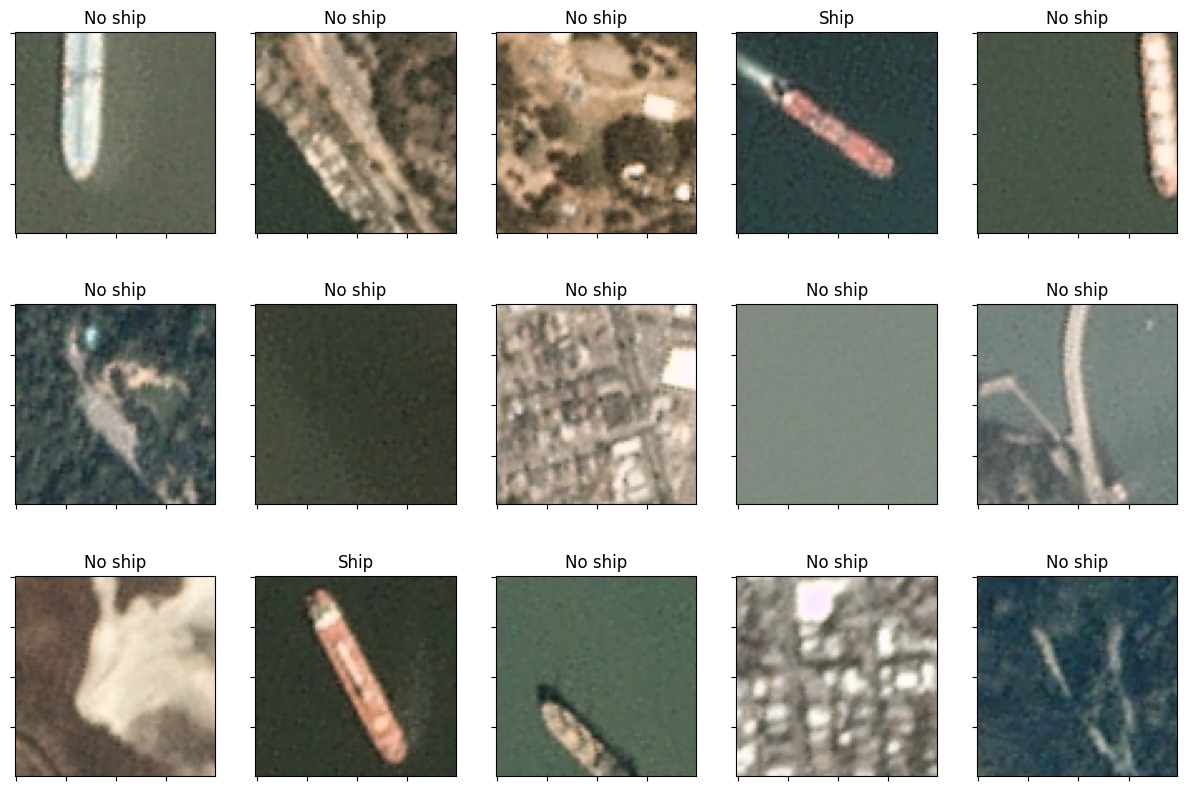

In [ ]:

basepath = "/content/drive/MyDrive/ProjektAI/shipsnet/shipsnet"


files_list_no_ship = glob(os.path.join(basepath, "0_*"))
files_list_ship = glob(os.path.join(basepath, "1_*"))

images = []
labels = []
text_labels = ['No ship', 'Ship']

for file in files_list_no_ship:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(img)
    labels.append(0)

for file in files_list_ship:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(img)
    labels.append(1)

images = np.array(images, dtype=np.int64)
labels = np.array(labels, dtype=np.int64)

# 70 trening walidacja 20 test 10
np.random.seed(27)
np.random.shuffle(images)

np.random.seed(27)
np.random.shuffle(labels)

train = int(0.7*len(images))
validation = int(0.2*len(images))
test = int(0.1*len(images))

X_train, y_train = images[:train], labels[:train]
X_validation, y_validation = images[train:(validation+train)], labels[train:(validation+train)]
X_test, y_test = images[(validation+train):], labels[(validation+train):]

n_classes = 2


y_train = to_categorical(y_train, n_classes)
y_validation = to_categorical(y_validation, n_classes)
y_test = to_categorical(y_test, n_classes)

# proba
n_rows = 3
n_cols = 5

plt.figure(figsize=(15, 10))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(text_labels[np.argmax(y_train[index])])

In [ ]:
# zdefiniowanie
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (80, 80, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 80, 80, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 40, 40, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 40, 40, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 40, 40, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        1

In [ ]:
# uzycie funkcji straty i optimizera
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("ship_detection.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, batch_size=16, epochs=38, verbose=1, validation_data=(X_validation, y_validation), callbacks=[checkpoint])

Epoch 1/38
176/176 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9975
Epoch 1: val_accuracy improved from -inf to 0.99127, saving model to ship_detection.keras
176/176 [==============================] - 7s 15ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0284 - val_accuracy: 0.9913
Epoch 2/38
175/176 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9975
Epoch 2: val_accuracy did not improve from 0.99127
176/176 [==============================] - 2s 12ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0380 - val_accuracy: 0.9850
Epoch 3/38
176/176 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9950
Epoch 3: val_accuracy did not improve from 0.99127
176/176 [==============================] - 2s 13ms/step - loss: 0.0109 - accuracy: 0.9950 - val_loss: 0.0698 - val_accuracy: 0.9776
Epoch 4/38
173/176 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9949
Epoch 4: val_accuracy did no

In [ ]:
# statystyka
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

13/13 [==============================] - 1s 24ms/step - loss: 0.0228 - accuracy: 0.9950
Test Loss: 0.02277631126344204
Test Accuracy: 0.9950124621391296


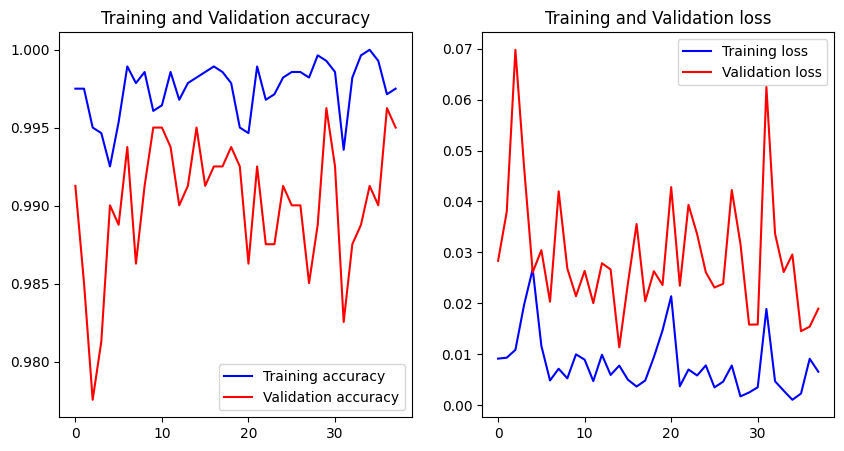

In [ ]:
# straty
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# prawidlowe predykcje
predicted_class = model.predict(X_test)

predicted_class_probability = np.max(predicted_class, axis=1)*100
predicted_class = np.argmax(predicted_class, axis=1)
true_class = np.argmax(y_test, axis=1)

correct = []
incorrect = []

for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

print('Correct predictions: ', len(correct))
print('Incorrect predictions: ', len(incorrect))

13/13 [==============================] - 0s 6ms/step
Correct predictions:  399
Incorrect predictions:  2


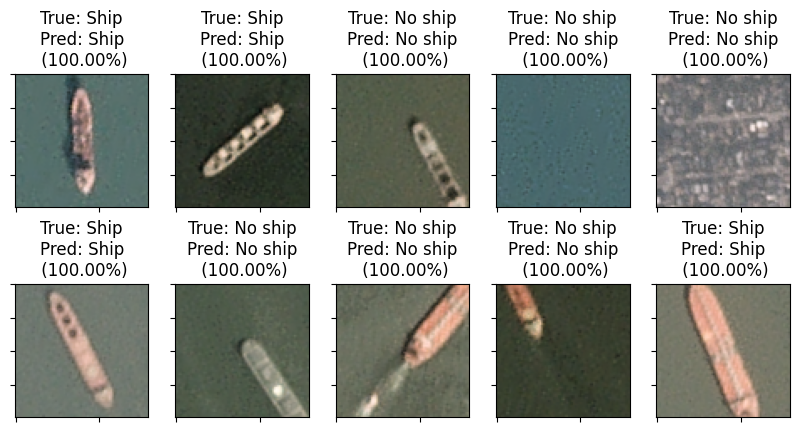

In [ ]:
random.shuffle(correct)
random.shuffle(incorrect)

# poprawne predykcje
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[correct[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[correct[i]]]) +
              '\nPred: ' + str(text_labels[predicted_class[correct[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[correct[i]])

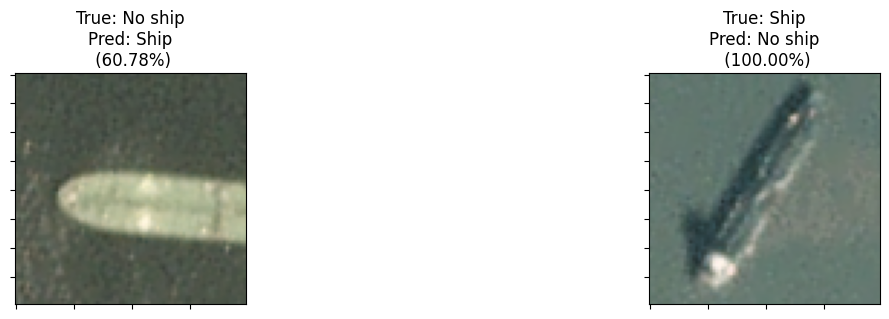

In [ ]:
# falszywe predykcje
n_rows = 1
n_cols = len(incorrect)

plt.figure(figsize=(15, 3*n_rows))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[incorrect[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[incorrect[i]]]) +
              '\nPred: ' + str(text_labels[predicted_class[incorrect[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[incorrect[i]])

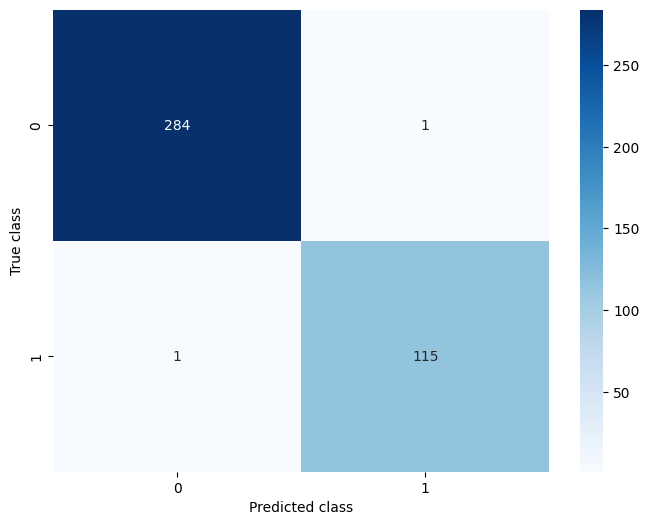

In [ ]:
# ilosc poprawnych predykcji w porownaniu do niepoprawnych
cm = confusion_matrix(true_class, predicted_class)
plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

In [ ]:
# zaznaczenie statkow
basepath = "/content"
stride = 5 #krok

scene_list = glob(os.path.join(basepath, "image*"))
scene_file = scene_list[0]

img = cv2.imread(scene_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

plt.figure(figsize=(15, 15))
ax = plt.subplot(1, 1, 1)
ax.imshow(img)

# zaznaczenie
for h in range(0, height-80, stride):
    print("Step", int(h/stride), "of", int((height-80)/stride))

    for w in range(0, width-80, stride):
        img_box = []
        img_box.append(img[h:h+80, w:w+80])
        img_box = np.array(img_box, dtype=np.int64)

        prediction = model.predict(img_box, verbose=2)
        prediction_probability = np.max(prediction)
        prediction_class = np.argmax(prediction)

        if (prediction_class == 1 and prediction_probability > 0.95):
            ax.add_patch(patches.Rectangle((w, h), 80, 80, edgecolor='r', facecolor='none'))
            ax.text(w, h, f"{w},{h}", color='g')  # dodanie koordynatows

plt.show()


Step 0 of 199
Step 1 of 199
Step 2 of 199
Step 3 of 199
Step 4 of 199
Step 5 of 199
Step 6 of 199
Step 7 of 199
Step 8 of 199
Step 9 of 199
Step 10 of 199
Step 11 of 199
Step 12 of 199
Step 13 of 199
Step 14 of 199
Step 15 of 199
Step 16 of 199
Step 17 of 199
Step 18 of 199
Step 19 of 199
Step 20 of 199
Step 21 of 199
Step 22 of 199
Step 23 of 199
Step 24 of 199
Step 25 of 199
Step 26 of 199
Step 27 of 199
Step 28 of 199
Step 29 of 199
Step 30 of 199
Step 31 of 199
Step 32 of 199
Step 33 of 199
Step 34 of 199
Step 35 of 199
Step 36 of 199
Step 37 of 199
Step 38 of 199
Step 39 of 199
Step 40 of 199
Step 41 of 199
Step 42 of 199
Step 43 of 199
Step 44 of 199
Step 45 of 199
Step 46 of 199
Step 47 of 199
Step 48 of 199
Step 49 of 199
Step 50 of 199
Step 51 of 199
Step 52 of 199
Step 53 of 199
Step 54 of 199
Step 55 of 199
Step 56 of 199
Step 57 of 199
Step 58 of 199
Step 59 of 199
Step 60 of 199
Step 61 of 199
Step 62 of 199
Step 63 of 199
Step 64 of 199
Step 65 of 199
Step 66 of 199
Step 